In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
import shutil

In [85]:
#Membaca file csv
file_path = 'D:\Tugas Akhir\Stroke\healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
# Menampilkan jumlah data awal dataset sebelum diubah
jumlah_data_awal = df.shape[0]
print("Jumlah data awal sebelum perubahan:", jumlah_data_awal)
df = df.drop('id', axis=1)
df.head()

Jumlah data awal sebelum perubahan: 5110


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [86]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [87]:
# Menghapus baris dengan nilai 'other' pada kolom 'age'
df = df[df['gender'] != 'Other']

# Menghapus baris dengan nilai 'children' atau 'Never_worked' pada kolom 'work_type'
df = df[~df['work_type'].isin(['children', 'Never_worked'])]

# Menghapus baris dengan nilai bmi lebih dari 60 dan usia kurang dari 25
df = df[(df['bmi'] <= 60) & (df['age'] >= 25)]
jumlah_data_akhir = df.shape[0]
print("Jumlah data akhir setelah perubahan:", jumlah_data_akhir)
df.head()

Jumlah data akhir setelah perubahan: 3689


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


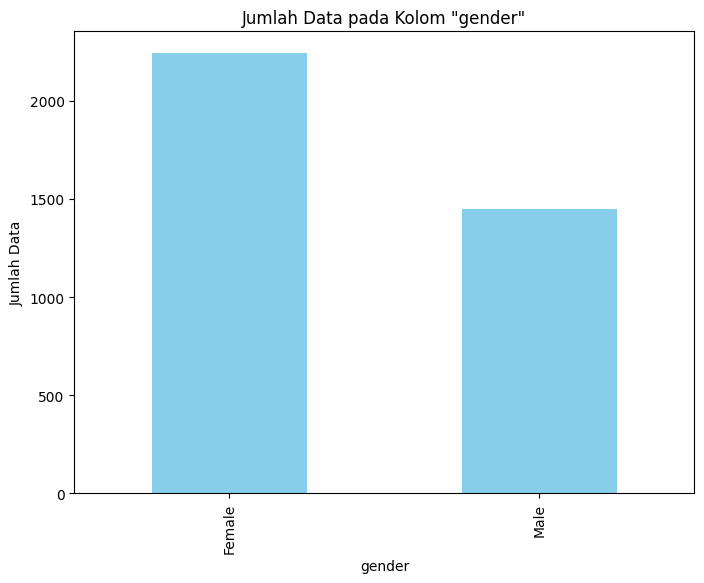

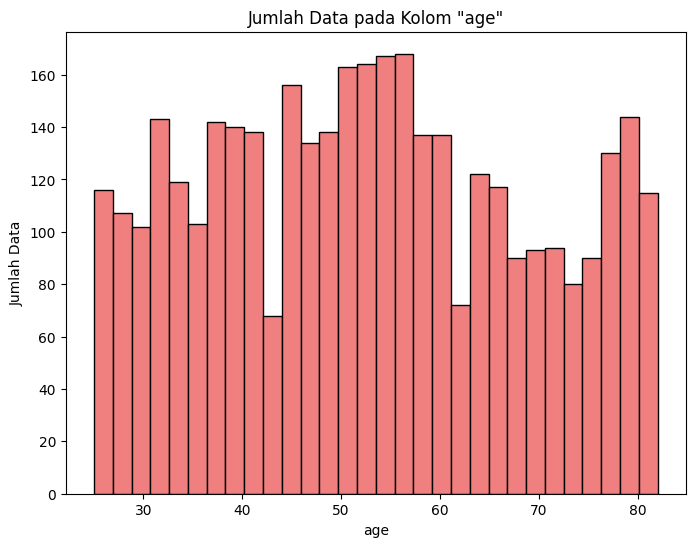

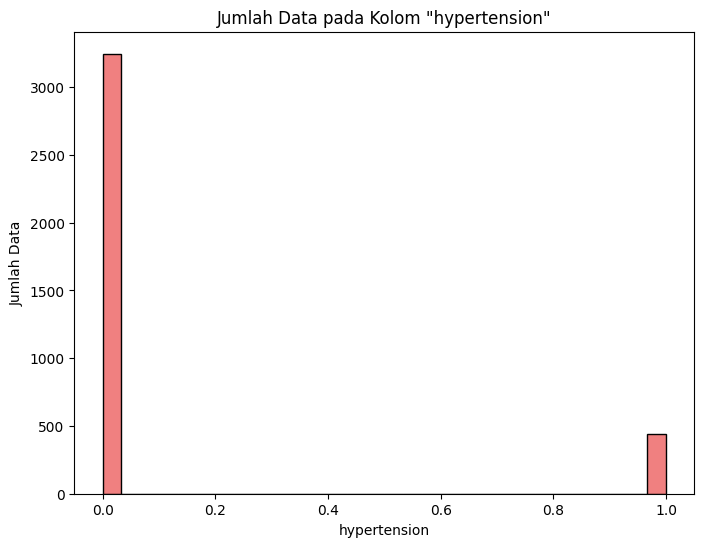

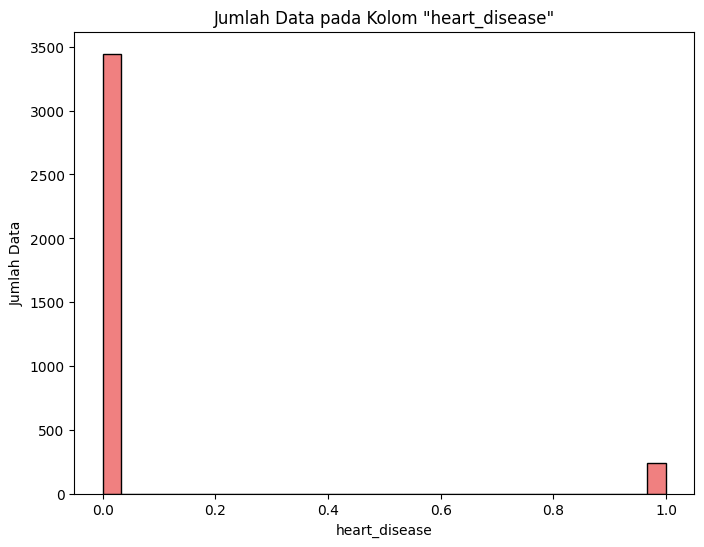

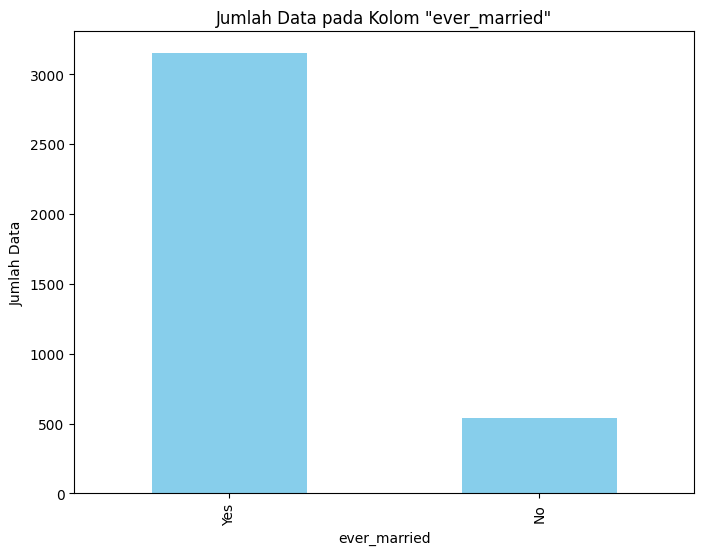

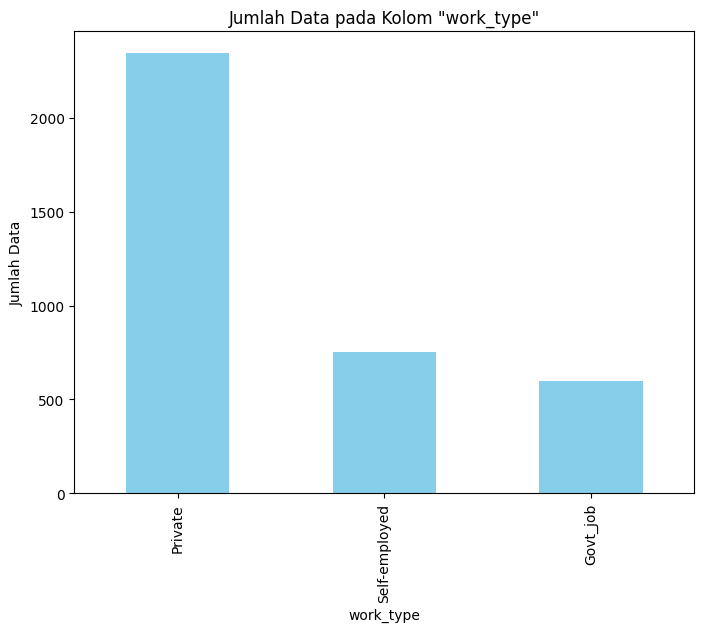

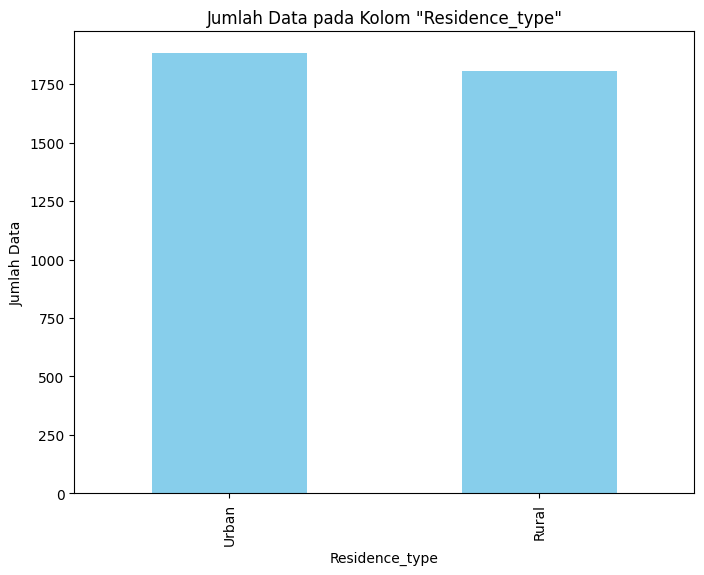

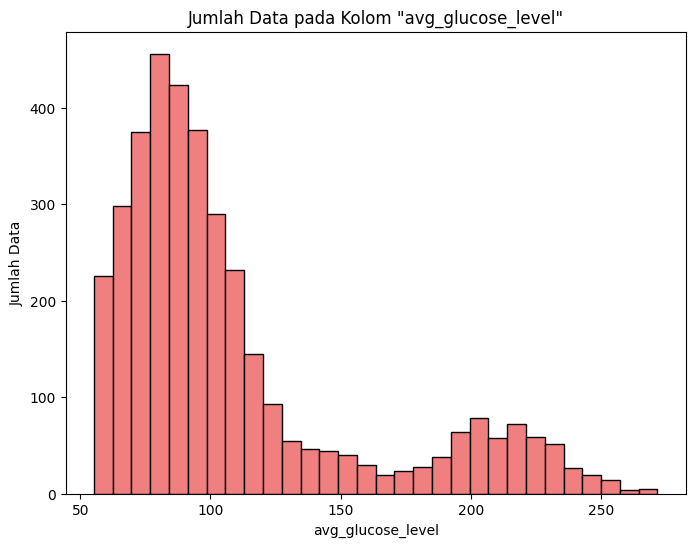

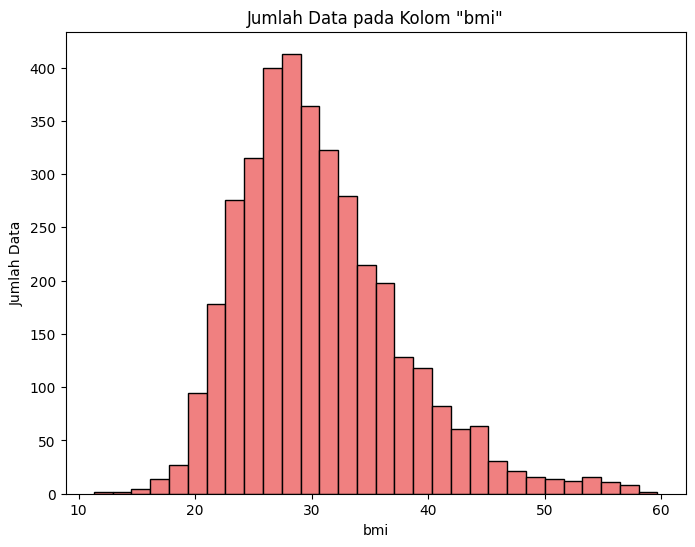

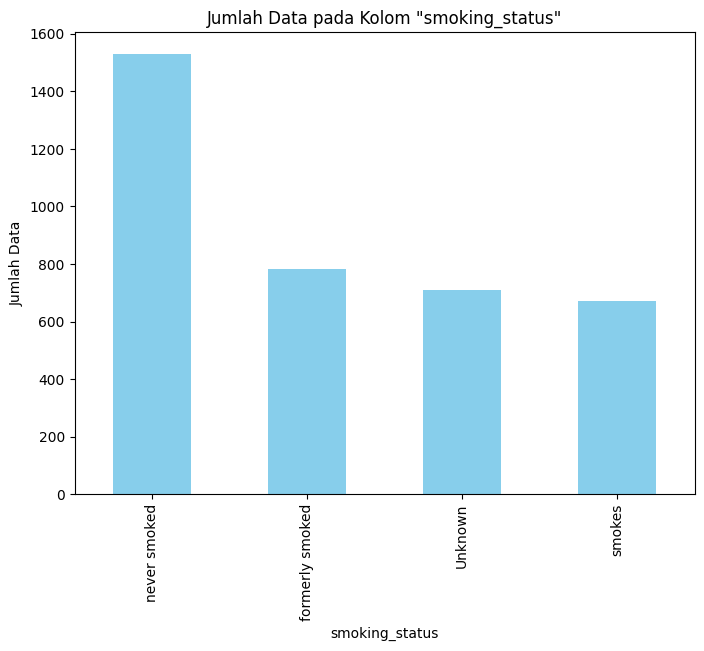

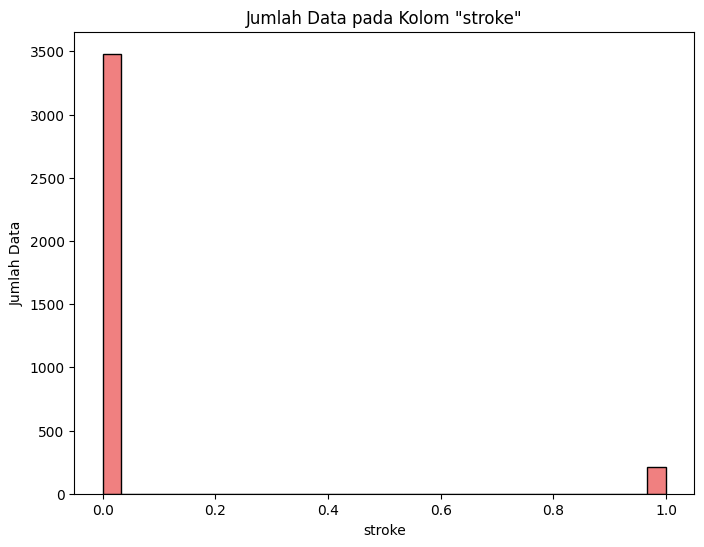

In [88]:
# Memilih kolom-kolom yang ingin diplot
selected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                     'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='skyblue')
    else:
        plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

<Axes: >

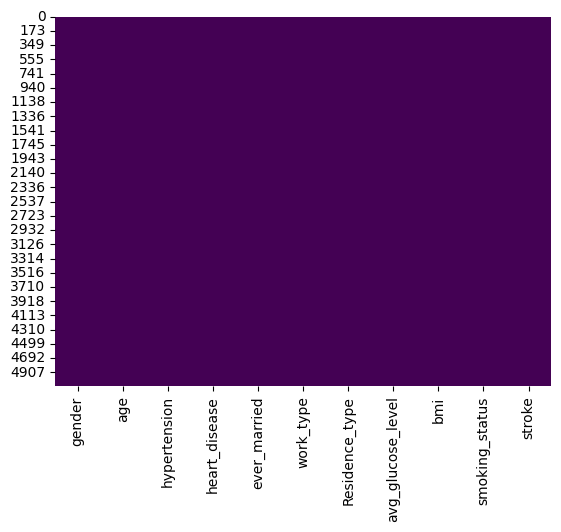

In [89]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [90]:
print(df['gender'].value_counts())
# Mengganti label 'male' menjadi 0 dan 'female' menjadi 1 pada kolom 'gender'
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df.head())

gender
Female    2242
Male      1447
Name: count, dtype: int64

Data setelah perubahan:
   gender   age  hypertension  heart_disease ever_married      work_type  \
0       0  67.0             0              1          Yes        Private   
2       0  80.0             0              1          Yes        Private   
3       1  49.0             0              0          Yes        Private   
4       1  79.0             1              0          Yes  Self-employed   
5       0  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  


In [91]:
print(df['ever_married'].value_counts())
# Mengganti label 'Yes' menjadi 1 dan 'No' menjadi 0 pada kolom 'ever_married'
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
df

ever_married
Yes    3148
No      541
Name: count, dtype: int64

Data setelah perubahan:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,Private,Rural,77.93,21.7,never smoked,0
5106,1,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,1,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,0,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [92]:
print(df['Residence_type'].value_counts())
# Mengganti label 'Urban' dan 'Rural' menjadi 0 dan 1 pada kolom 'Residence_type'
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
df

Residence_type
Urban    1881
Rural    1808
Name: count, dtype: int64

Data setelah perubahan:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
5,0,81.0,0,0,1,Private,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,Private,1,77.93,21.7,never smoked,0
5106,1,81.0,0,0,1,Self-employed,0,125.20,40.0,never smoked,0
5107,1,35.0,0,0,1,Self-employed,1,82.99,30.6,never smoked,0
5108,0,51.0,0,0,1,Private,1,166.29,25.6,formerly smoked,0


In [93]:
# One-hot encoding untuk kolom 'work_type'
x_work_type = df['work_type'].values.reshape(-1, 1)
encoder_work_type = OneHotEncoder(sparse_output=False)
x_work_type_encoded = encoder_work_type.fit_transform(x_work_type)
df_work_type_encoded = pd.DataFrame(x_work_type_encoded, columns=encoder_work_type.get_feature_names_out(['work_type']))
df_work_type_encoded


,work_type_Govt_job,work_type_Private,work_type_Self-employed
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
3684,0.0,1.0,0.0
3685,0.0,0.0,1.0
3686,0.0,0.0,1.0
3687,0.0,1.0,0.0


In [94]:
# One-hot encoding untuk kolom 'smoking_status'
x_smoking_status = df['smoking_status'].values.reshape(-1, 1)
encoder_smoking_status = OneHotEncoder(sparse_output=False)
x_smoking_status_encoded = encoder_smoking_status.fit_transform(x_smoking_status)
df_smoking_status_encoded = pd.DataFrame(x_smoking_status_encoded, columns=encoder_smoking_status.get_feature_names_out(['smoking_status']))
df_smoking_status_encoded

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
3684,0.0,0.0,1.0,0.0
3685,0.0,0.0,1.0,0.0
3686,0.0,0.0,1.0,0.0
3687,0.0,1.0,0.0,0.0


In [95]:
# Reset index untuk kedua DataFrame hasil one-hot encoding
df_work_type_encoded.reset_index(drop=True, inplace=True)
df_smoking_status_encoded.reset_index(drop=True, inplace=True)
# Menggabungkan hasil one-hot encoding
df_encoded = pd.concat([df_work_type_encoded, df_smoking_status_encoded], axis=1)

# Reset index
df.reset_index(drop=True, inplace=True)
# Mendrop kolom 'work_type' dan 'smoking_status' dari DataFrame asli
df = pd.concat([df_encoded, df], axis=1).drop(['work_type', 'smoking_status'], axis=1)
# Menentukan urutan kolom sesuai kriteria
column_order = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
                'Residence_type', 'avg_glucose_level', 'bmi',
                'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes',
                'stroke']

# Mengurutkan kolom sesuai dengan urutan yang diinginkan
df = df[column_order]
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,67.0,0,1,1,0.0,1.0,0.0,0,228.69,36.6,0.0,1.0,0.0,0.0,1
1,0,80.0,0,1,1,0.0,1.0,0.0,1,105.92,32.5,0.0,0.0,1.0,0.0,1
2,1,49.0,0,0,1,0.0,1.0,0.0,0,171.23,34.4,0.0,0.0,0.0,1.0,1
3,1,79.0,1,0,1,0.0,0.0,1.0,1,174.12,24.0,0.0,0.0,1.0,0.0,1
4,0,81.0,0,0,1,0.0,1.0,0.0,0,186.21,29.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,57.0,0,0,1,0.0,1.0,0.0,1,77.93,21.7,0.0,0.0,1.0,0.0,0
3685,1,81.0,0,0,1,0.0,0.0,1.0,0,125.20,40.0,0.0,0.0,1.0,0.0,0
3686,1,35.0,0,0,1,0.0,0.0,1.0,1,82.99,30.6,0.0,0.0,1.0,0.0,0
3687,0,51.0,0,0,1,0.0,1.0,0.0,1,166.29,25.6,0.0,1.0,0.0,0.0,0


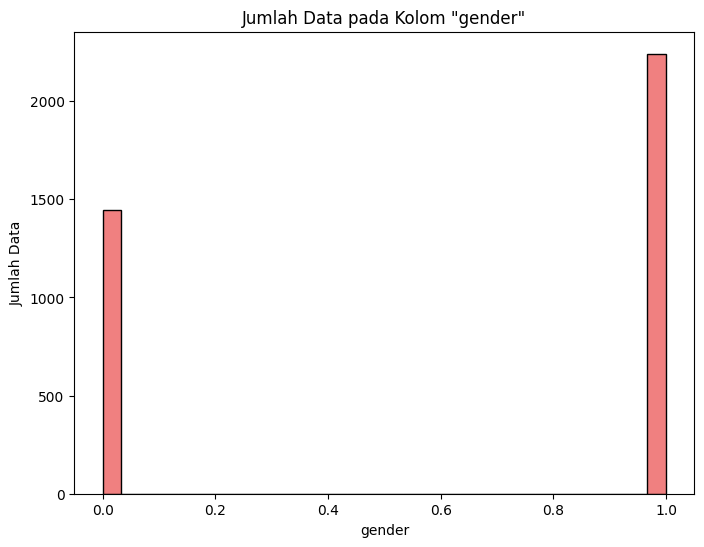

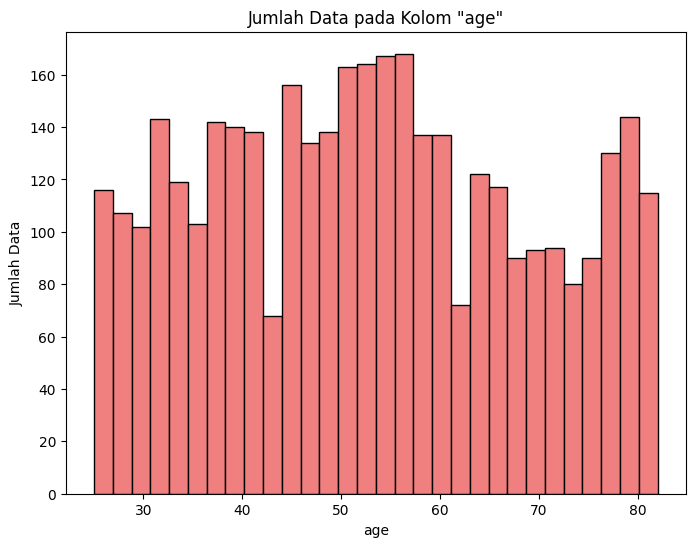

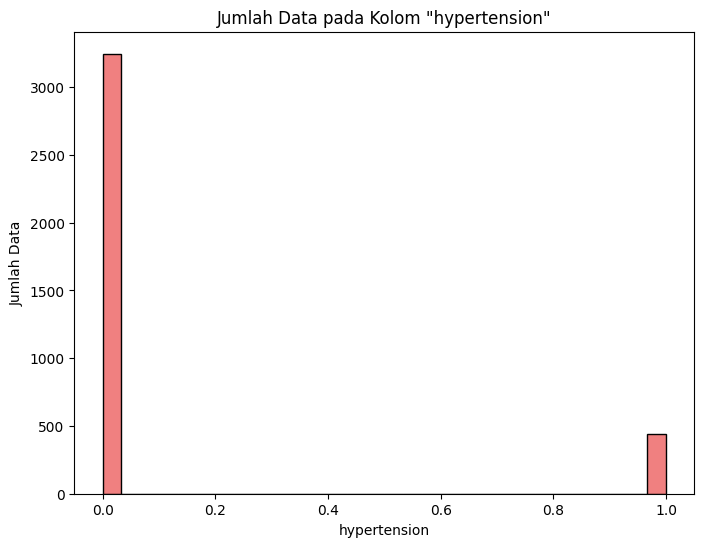

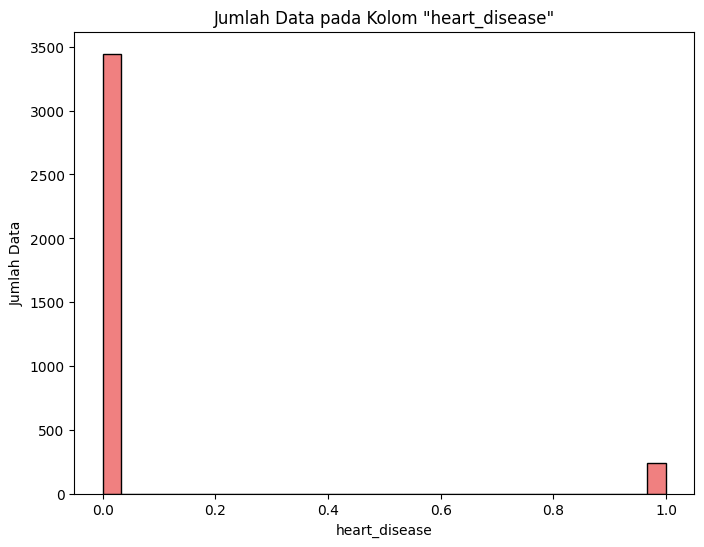

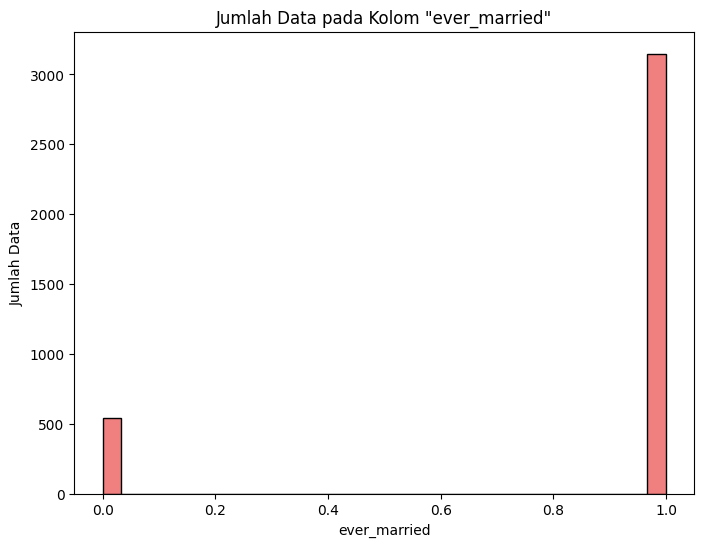

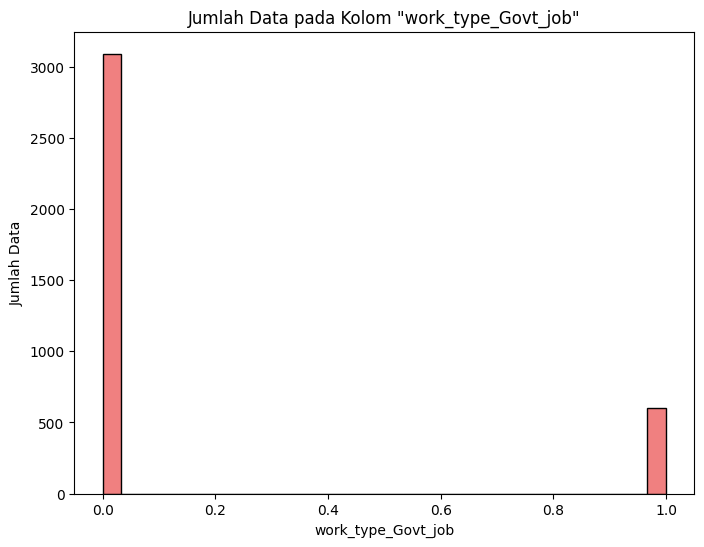

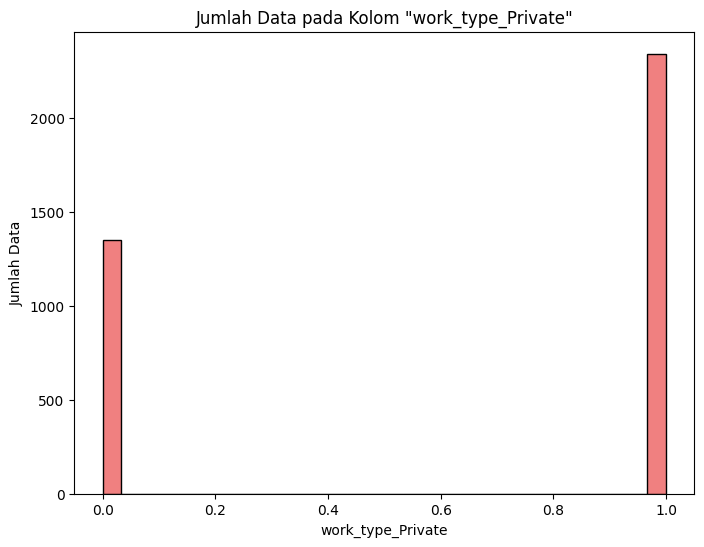

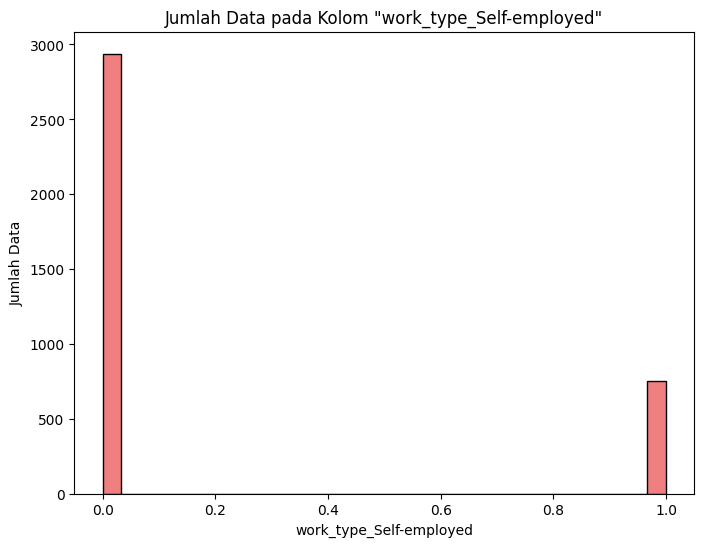

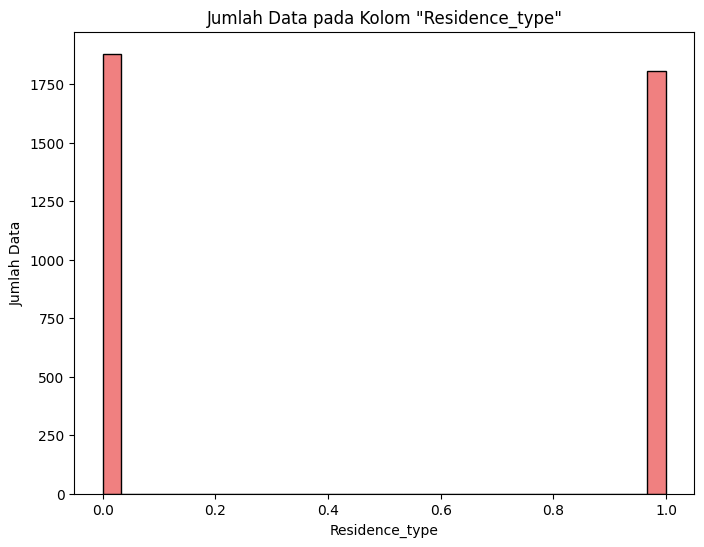

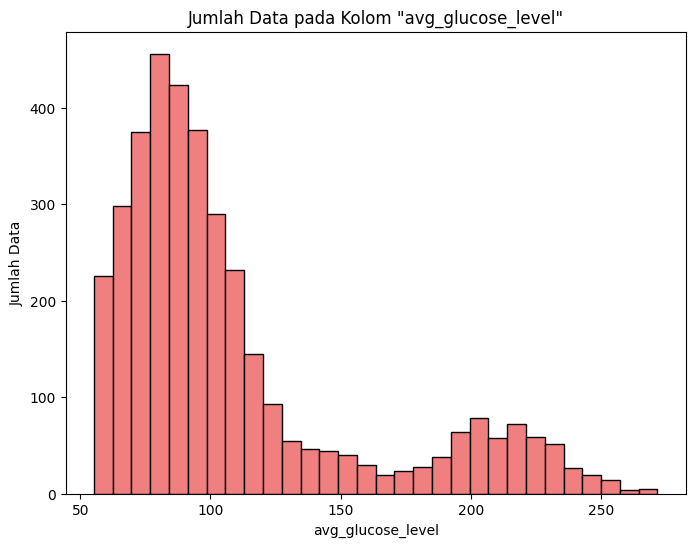

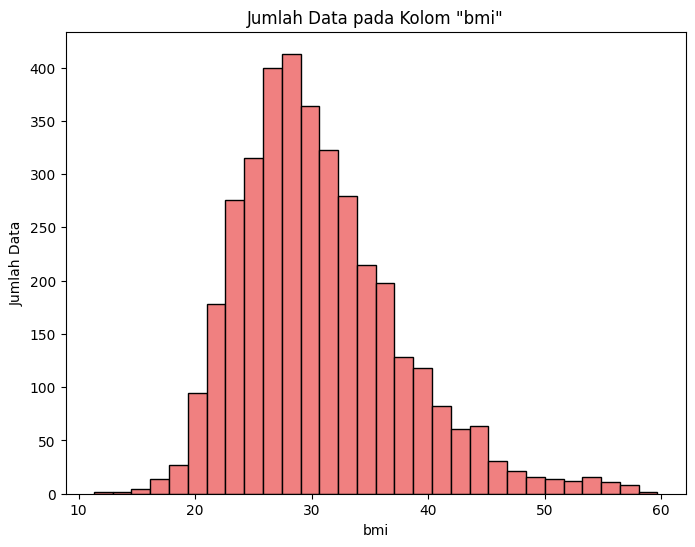

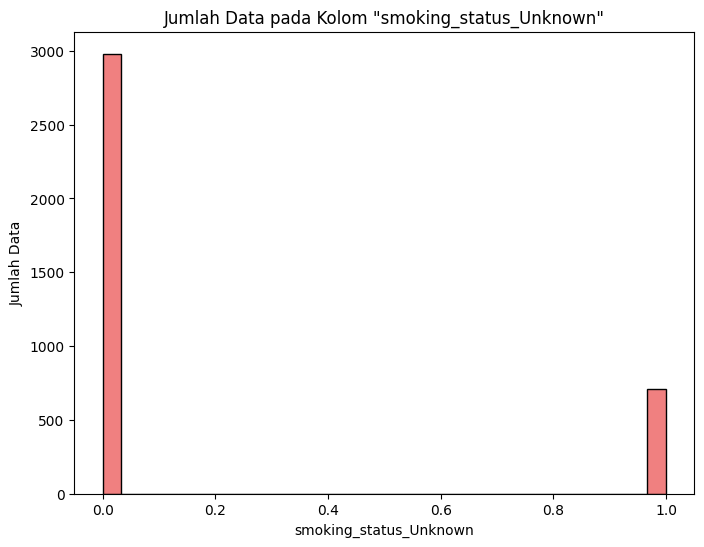

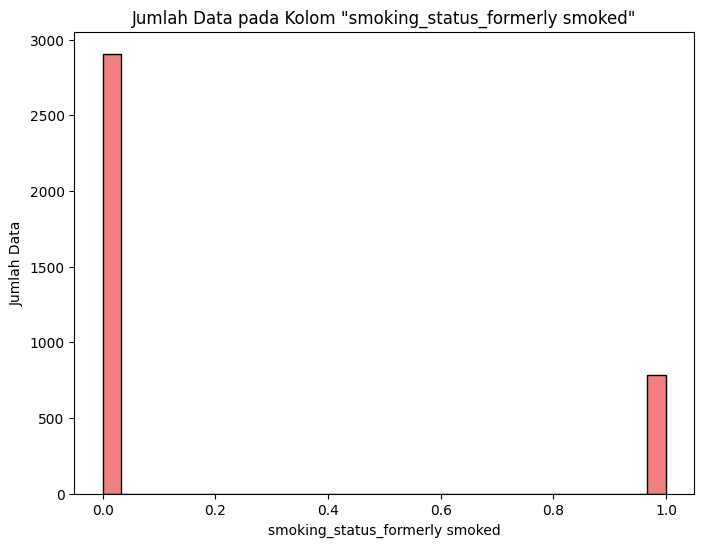

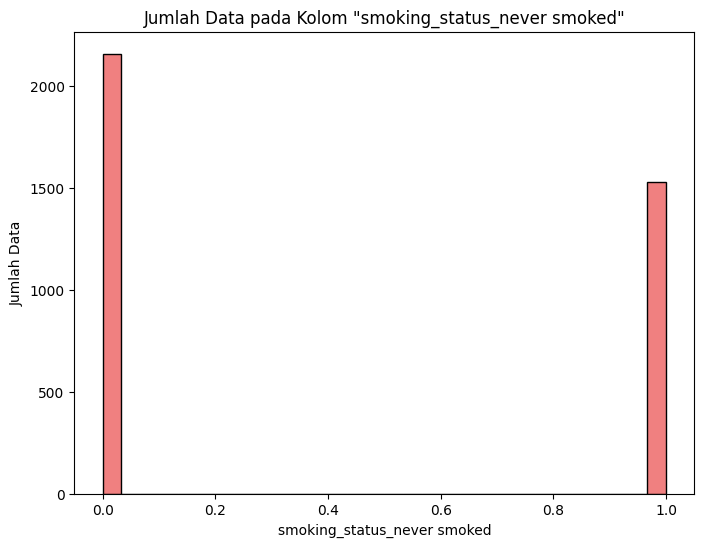

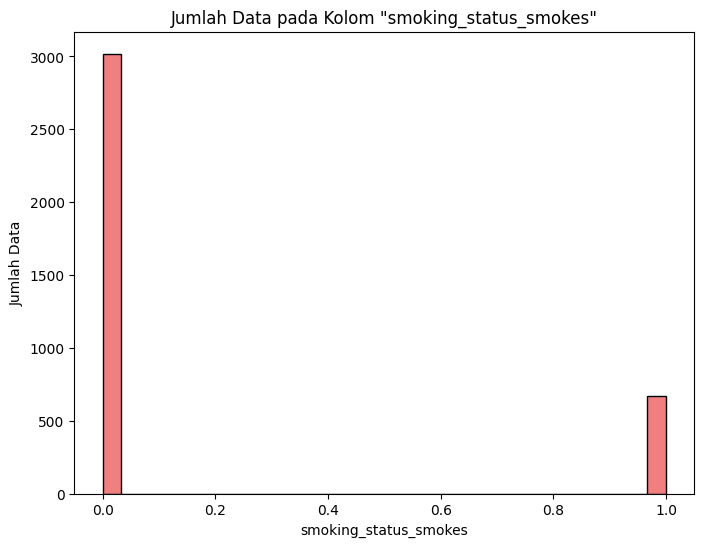

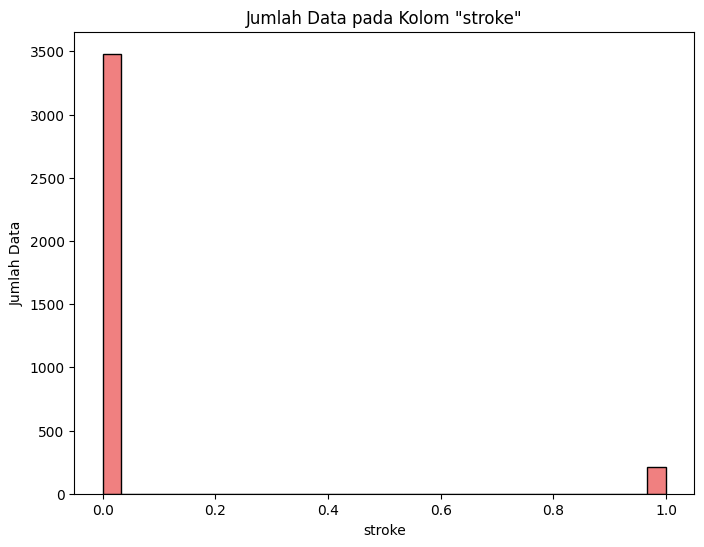

In [96]:
selected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
                'Residence_type', 'avg_glucose_level', 'bmi',
                'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes',
                'stroke']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='skyblue')
    else:
        plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

In [97]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,67.0,0,1,1,0.0,1.0,0.0,0,228.69,36.6,0.0,1.0,0.0,0.0,1
1,0,80.0,0,1,1,0.0,1.0,0.0,1,105.92,32.5,0.0,0.0,1.0,0.0,1
2,1,49.0,0,0,1,0.0,1.0,0.0,0,171.23,34.4,0.0,0.0,0.0,1.0,1
3,1,79.0,1,0,1,0.0,0.0,1.0,1,174.12,24.0,0.0,0.0,1.0,0.0,1
4,0,81.0,0,0,1,0.0,1.0,0.0,0,186.21,29.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,57.0,0,0,1,0.0,1.0,0.0,1,77.93,21.7,0.0,0.0,1.0,0.0,0
3685,1,81.0,0,0,1,0.0,0.0,1.0,0,125.20,40.0,0.0,0.0,1.0,0.0,0
3686,1,35.0,0,0,1,0.0,0.0,1.0,1,82.99,30.6,0.0,0.0,1.0,0.0,0
3687,0,51.0,0,0,1,0.0,1.0,0.0,1,166.29,25.6,0.0,1.0,0.0,0.0,0


In [98]:
print(df.dtypes)

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
work_type_Govt_job                float64
work_type_Private                 float64
work_type_Self-employed           float64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
smoking_status_Unknown            float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
stroke                              int64
dtype: object


In [99]:
# Mengubah tipe data float64 menjadi int64 kecuali avg_glucose_level dan bmi
for column in df.columns:
    if df[column].dtype == float and column not in ['avg_glucose_level', 'bmi']:
        df[column] = df[column].astype(int)

In [100]:
print(df.dtypes)

gender                              int64
age                                 int32
hypertension                        int64
heart_disease                       int64
ever_married                        int64
work_type_Govt_job                  int32
work_type_Private                   int32
work_type_Self-employed             int32
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
smoking_status_Unknown              int32
smoking_status_formerly smoked      int32
smoking_status_never smoked         int32
smoking_status_smokes               int32
stroke                              int64
dtype: object


In [101]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,67,0,1,1,0,1,0,0,228.69,36.6,0,1,0,0,1
1,0,80,0,1,1,0,1,0,1,105.92,32.5,0,0,1,0,1
2,1,49,0,0,1,0,1,0,0,171.23,34.4,0,0,0,1,1
3,1,79,1,0,1,0,0,1,1,174.12,24.0,0,0,1,0,1
4,0,81,0,0,1,0,1,0,0,186.21,29.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,57,0,0,1,0,1,0,1,77.93,21.7,0,0,1,0,0
3685,1,81,0,0,1,0,0,1,0,125.20,40.0,0,0,1,0,0
3686,1,35,0,0,1,0,0,1,1,82.99,30.6,0,0,1,0,0
3687,0,51,0,0,1,0,1,0,1,166.29,25.6,0,1,0,0,0


In [102]:
# Simpan DataFrame ke dalam file CSV dengan format desimal yang benar
df.to_csv('hasil_awal_onehot.csv', index=False, float_format='%.2f', decimal=',')

# Pindahkan file ke direktori yang diinginkan
shutil.move('hasil_awal_onehot.csv', 'D:\\Tugas Akhir\\Stroke\\hasil_awal_onehot.csv')


'D:\\Tugas Akhir\\Stroke\\hasil_awal_onehot.csv'

In [103]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,67,0,1,1,0,1,0,0,228.69,36.6,0,1,0,0,1
1,0,80,0,1,1,0,1,0,1,105.92,32.5,0,0,1,0,1
2,1,49,0,0,1,0,1,0,0,171.23,34.4,0,0,0,1,1
3,1,79,1,0,1,0,0,1,1,174.12,24.0,0,0,1,0,1
4,0,81,0,0,1,0,1,0,0,186.21,29.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,57,0,0,1,0,1,0,1,77.93,21.7,0,0,1,0,0
3685,1,81,0,0,1,0,0,1,0,125.20,40.0,0,0,1,0,0
3686,1,35,0,0,1,0,0,1,1,82.99,30.6,0,0,1,0,0
3687,0,51,0,0,1,0,1,0,1,166.29,25.6,0,1,0,0,0


In [104]:
x = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Simpan data latih dan uji ke dalam file CSV dengan format yang sama
X_train.assign(stroke=y_train).to_csv('data_train.csv', index=False, float_format='%.2f', decimal=',')
X_test.assign(stroke=y_test).to_csv('data_test.csv', index=False, float_format='%.2f', decimal=',')
# Pindahkan file CSV ke direktori tertentu (gunakan shutil)
shutil.copyfile('data_train.csv', 'D:\Tugas Akhir\Stroke\data_train.csv')
shutil.copyfile('data_test.csv', 'D:\Tugas Akhir\Stroke\data_test.csv')

'D:\\Tugas Akhir\\Stroke\\data_test.csv'

In [105]:
file_path = 'D:\Tugas Akhir\Stroke\data_train.csv'
df = pd.read_csv(file_path)

# Mengganti koma dengan titik dalam kolom numerik
numeric_columns = ['avg_glucose_level', 'bmi']
df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True)

x = df.drop('stroke', axis=1)
y = df['stroke']

In [106]:
#Standarisasi data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Buat DataFrame baru untuk menampilkan hasil standarisasi
df_scaled = pd.DataFrame(data=x_scaled, columns=x.columns)
# Tampilkan semua baris data beserta nilai standar deviasinya
for index, row in df_scaled.iterrows():
    print(f"Baris {index + 1} - Nilai Std:")
    print(row)
    print("\n")

Baris 1 - Nilai Std:
gender                            0.801933
age                              -1.170870
hypertension                     -0.370387
heart_disease                    -0.268907
ever_married                     -2.354408
work_type_Govt_job               -0.434145
work_type_Private                 0.752009
work_type_Self-employed          -0.504127
Residence_type                    1.008508
avg_glucose_level                -0.457995
bmi                               1.105611
smoking_status_Unknown            2.057248
smoking_status_formerly smoked   -0.518890
smoking_status_never smoked      -0.840694
smoking_status_smokes            -0.472722
Name: 0, dtype: float64


Baris 2 - Nilai Std:
gender                            0.801933
age                              -0.478992
hypertension                     -0.370387
heart_disease                    -0.268907
ever_married                     -2.354408
work_type_Govt_job               -0.434145
work_type_Private            

In [107]:
# Tampilkan matriks kovarians
cov_matrix = np.cov(x_scaled, rowvar=False)
print("Matriks Kovarians:")
print(cov_matrix)

Matriks Kovarians:
[[ 1.00033898e+00 -5.58404489e-02 -4.40653045e-02 -1.08328038e-01
  -2.80236457e-02  4.12935310e-03 -2.63510320e-02  2.77372372e-02
  -3.32341142e-03 -6.32242584e-02 -2.27741375e-02  3.08339258e-03
  -7.30335229e-02  9.20517790e-02 -4.32126784e-02]
 [-5.58404489e-02  1.00033898e+00  2.26952158e-01  2.63359959e-01
   2.37941013e-01 -1.12649642e-02 -2.11500996e-01  2.62983656e-01
  -1.02477338e-02  2.26711743e-01 -5.39189101e-02 -3.08052812e-02
   1.46122639e-01 -1.55397898e-02 -1.03450062e-01]
 [-4.40653045e-02  2.26952158e-01  1.00033898e+00  1.03727576e-01
   4.74571971e-02 -9.85269947e-03 -5.28681302e-02  7.21318667e-02
  -1.02422766e-03  1.73545079e-01  1.03389914e-01 -8.74556583e-02
   3.94120021e-02  4.13747642e-02 -5.45026414e-03]
 [-1.08328038e-01  2.63359959e-01  1.03727576e-01  1.00033898e+00
   3.16054814e-02 -9.47119196e-03 -3.69049268e-02  5.27089277e-02
   3.63075450e-03  1.57434961e-01 -1.22238097e-02 -2.41798397e-02
   3.89697279e-02 -3.95325151e-02  3

In [108]:
column_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
                'Residence_type', 'avg_glucose_level', 'bmi',
                'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes',
                'stroke']
threshold = 0.1
# Tampilkan elemen diagonal utama (varian)
variances = np.diag(cov_matrix)
print("\nVarian Setiap Variabel:")
print(variances)

# Tampilkan elemen non-diagonal (kovarians)
covariances = cov_matrix - np.diag(variances)
print("\nKovarians Antar Variabel:")
print(covariances)

# Temukan kolom-kolom dengan korelasi positif dan negatif
positive_correlation_indices = np.where(covariances > threshold)
negative_correlation_indices = np.where(covariances < -threshold)

# Tampilkan hasil
print("\nKolom dengan Korelasi Positif:")
for i, j in zip(positive_correlation_indices[0], positive_correlation_indices[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

print("\nKolom dengan Korelasi Negatif:")
for i, j in zip(negative_correlation_indices[0], negative_correlation_indices[1]):
    print(f"{column_names[i]} dan {column_names[j]}")


Varian Setiap Variabel:
[1.00033898 1.00033898 1.00033898 1.00033898 1.00033898 1.00033898
 1.00033898 1.00033898 1.00033898 1.00033898 1.00033898 1.00033898
 1.00033898 1.00033898 1.00033898]

Kovarians Antar Variabel:
[[ 0.00000000e+00 -5.58404489e-02 -4.40653045e-02 -1.08328038e-01
  -2.80236457e-02  4.12935310e-03 -2.63510320e-02  2.77372372e-02
  -3.32341142e-03 -6.32242584e-02 -2.27741375e-02  3.08339258e-03
  -7.30335229e-02  9.20517790e-02 -4.32126784e-02]
 [-5.58404489e-02  0.00000000e+00  2.26952158e-01  2.63359959e-01
   2.37941013e-01 -1.12649642e-02 -2.11500996e-01  2.62983656e-01
  -1.02477338e-02  2.26711743e-01 -5.39189101e-02 -3.08052812e-02
   1.46122639e-01 -1.55397898e-02 -1.03450062e-01]
 [-4.40653045e-02  2.26952158e-01  0.00000000e+00  1.03727576e-01
   4.74571971e-02 -9.85269947e-03 -5.28681302e-02  7.21318667e-02
  -1.02422766e-03  1.73545079e-01  1.03389914e-01 -8.74556583e-02
   3.94120021e-02  4.13747642e-02 -5.45026414e-03]
 [-1.08328038e-01  2.63359959e-0

In [109]:
# Hitung eigenvalues dan eigenvectors
pca = PCA()
pca.fit(x_scaled)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Tampilkan eigenvalues beserta nama kolom
print("\nEigenvalues:")
for col, value in zip(x.columns, eigenvalues):
    print(f"{col}: {round(value, 4)}")

# Tampilkan eigenvectors beserta nama kolom
print("\nEigenvectors:")
for i, vector in enumerate(eigenvectors):
    print(f"Principal Component {i + 1}:")
    for col, value in zip(x.columns, vector):
        print(f"   {col}: {round(value, 4)}")



Eigenvalues:
gender: 2.0616
age: 1.6172
hypertension: 1.5222
heart_disease: 1.2842
ever_married: 1.2072
work_type_Govt_job: 1.1725
work_type_Private: 1.0757
work_type_Self-employed: 0.9978
Residence_type: 0.9874
avg_glucose_level: 0.915
bmi: 0.8482
smoking_status_Unknown: 0.7609
smoking_status_formerly smoked: 0.5551
smoking_status_never smoked: 0.0
smoking_status_smokes: 0.0

Eigenvectors:
Principal Component 1:
   gender: -0.0663
   age: 0.4616
   hypertension: 0.2451
   heart_disease: 0.2342
   ever_married: 0.1865
   work_type_Govt_job: 0.176
   work_type_Private: -0.5212
   work_type_Self-employed: 0.4629
   Residence_type: -0.0065
   avg_glucose_level: 0.2435
   bmi: 0.0288
   smoking_status_Unknown: -0.0898
   smoking_status_formerly smoked: 0.2008
   smoking_status_never smoked: -0.0326
   smoking_status_smokes: -0.0795
Principal Component 2:
   gender: -0.2563
   age: 0.1869
   hypertension: 0.1852
   heart_disease: 0.2485
   ever_married: 0.1297
   work_type_Govt_job: -0.374

In [110]:
# # Contoh: Menetapkan batas 90% varians yang akan dipertahankan
# threshold_variance = 0.90
# selected_n_components_variance = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold_variance) + 1
# print(f"Jumlah Komponen Utama yang Dipilih untuk {threshold_variance * 100}% Varians: {selected_n_components_variance}")



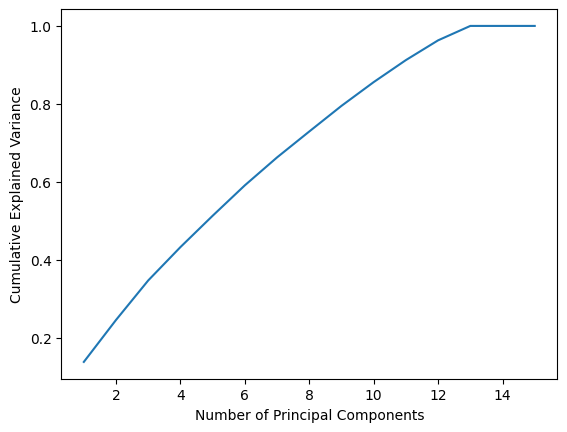

In [111]:
pca.fit(x_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [112]:
# Lakukan PCA
n_components = 13  # Ganti dengan jumlah komponen utama yang diinginkan
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x_scaled)


In [113]:
# Tampilkan explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Tampilkan komponen utama
print("\nPrincipal Components:")
print(pca.components_)

Explained Variance Ratio:
[0.13739603 0.10777922 0.10144691 0.08558539 0.08045237 0.07813959
 0.0716866  0.06650063 0.06580457 0.06097766 0.05652671 0.05071124
 0.03699307]

Principal Components:
[[-0.0663457   0.46162366  0.24510052  0.23423731  0.18651151  0.17602258
  -0.52119519  0.46287269 -0.006537    0.24345642  0.0287776  -0.0897559
   0.20077502 -0.03262452 -0.07950732]
 [-0.25628911  0.1868664   0.18519035  0.24852951  0.1297239  -0.37494216
   0.43615878 -0.18048268 -0.00819846  0.27664267  0.18172314  0.02460767
   0.35710356 -0.41257471  0.12307724]
 [ 0.05467033  0.14284838  0.2426375   0.08840102  0.10063562 -0.23074709
   0.25665657 -0.09701402  0.07759224  0.20827936  0.07736754 -0.38299427
  -0.15454443  0.672782   -0.30441902]
 [-0.13848154 -0.15712342  0.15568789  0.0789233  -0.09320523  0.39014674
  -0.09086775 -0.24596202 -0.08282884  0.15292908  0.21310912 -0.50736904
  -0.09789226  0.02023933  0.59408101]
 [-0.0357781  -0.09527613 -0.05284968 -0.18570874  0.0370

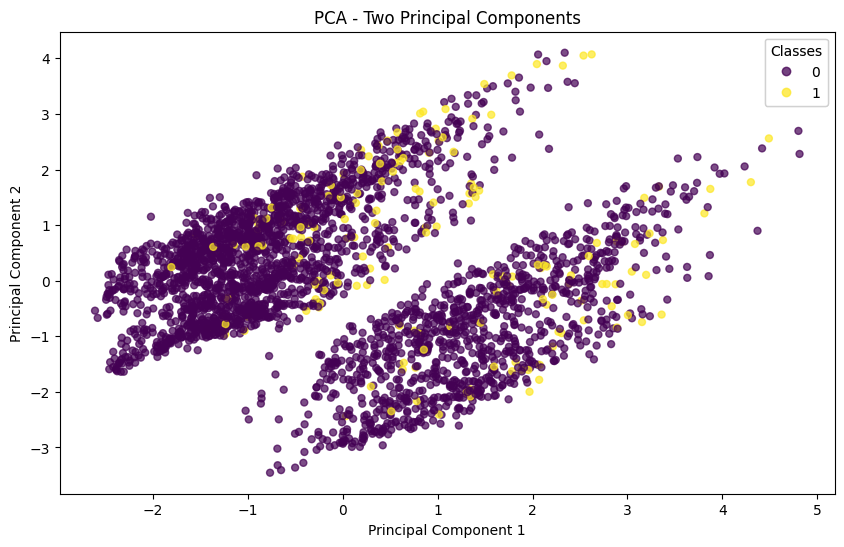

In [114]:
# Kolom 8: Plotting hasil PCA menggunakan 13 komponen utama
df_pca_result = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(13)])
df_pca_result['stroke'] = y  # Tambahkan kolom target ke hasil PCA
df_pca_result.to_csv('data_setelah_pca.csv', index=False)
shutil.copy('data_setelah_pca.csv', 'D:/Tugas Akhir/Stroke/data_setelah_pca.csv')

# Plot hasil PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca_result['PC1'], df_pca_result['PC2'], c=df_pca_result['stroke'], cmap='viridis', marker='o', s=25, alpha=0.7)

# Tambahkan legenda untuk kelas
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# Tambahkan label dan judul
plt.title('PCA - Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


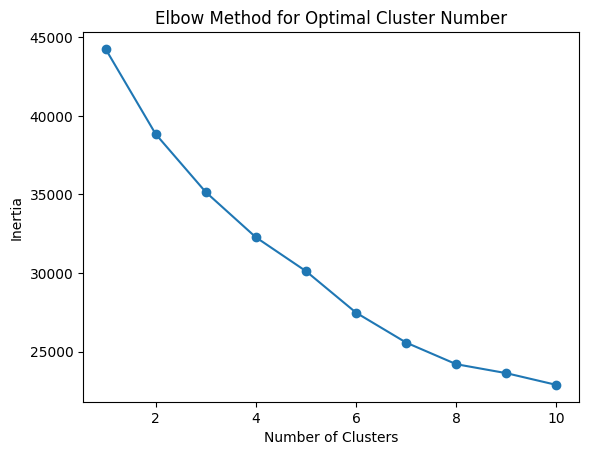

In [115]:
# Range jumlah cluster yang akan diuji
range_clusters = range(1, 11)  # Misalnya, uji dari 1 hingga 10 clusters

# Simpan inersia untuk setiap jumlah cluster
inertia = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [116]:
from sklearn import metrics
# Misalnya, Anda telah menentukan 7 cluster
n_clusters = 7

# Range n_init yang akan diuji
range_n_init = [10, 20, 30, 40, 50]

# Simpan metrik evaluasi untuk setiap n_init
evaluation_metrics = {}

for n_init in range_n_init:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Hitung dan simpan metrik evaluasi, misalnya, silhouette score
    silhouette_score = metrics.silhouette_score(X_pca, cluster_labels)
    evaluation_metrics[n_init] = silhouette_score

# Cetak hasil evaluasi untuk melihat sejauh mana hasil klastering konsisten
print("Evaluation Metrics:")
for n_init, score in evaluation_metrics.items():
    print(f"n_init={n_init}: Silhouette Score={score}")


Evaluation Metrics:
n_init=10: Silhouette Score=0.20295421767954477
n_init=20: Silhouette Score=0.20295421767954477
n_init=30: Silhouette Score=0.20295421767954477
n_init=40: Silhouette Score=0.20295421767954477
n_init=50: Silhouette Score=0.20295421767954477


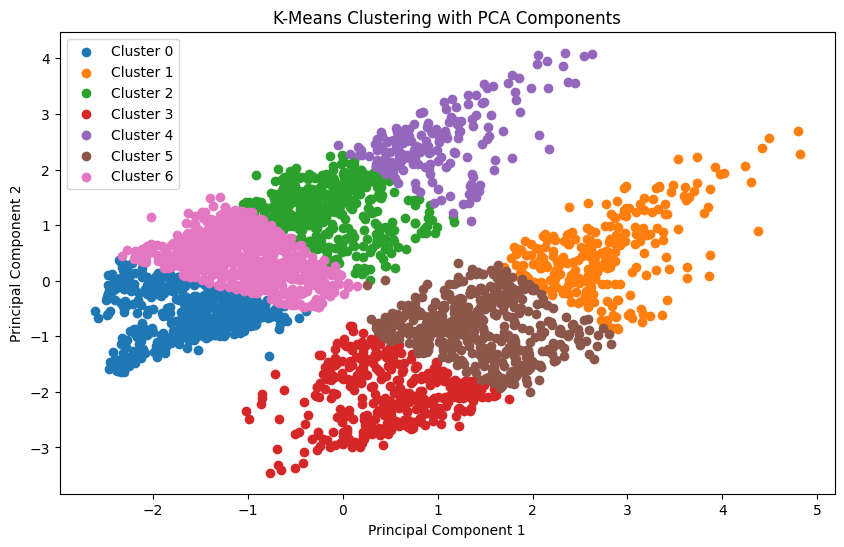

In [117]:
# Bagian 2: K-Means
# Pilih fitur hasil PCA (dalam contoh ini, ambil PC1 dan PC2)
X_pca = df_pca_result[['PC1', 'PC2']].values

# Inisialisasi model K-Means dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=7, n_init=10)

# Menentukan label cluster untuk setiap data hasil PCA
cluster_labels = kmeans.fit_predict(X_pca)  # X_pca adalah hasil PCA

# Menyatukan label klaster ke dalam dataset hasil PCA
df_pca_result['Cluster'] = cluster_labels

# Visualisasi hasil klastering
plt.figure(figsize=(10, 6))

# Plot klaster
for cluster in range(7):
    cluster_data = df_pca_result[df_pca_result["Cluster"] == cluster]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f'Cluster {cluster}')

# Tambahkan label dan judul
plt.title('K-Means Clustering with PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [118]:
# # Menambahkan kolom 'cluster_label' ke DataFrame hasil PCA
# df_pca_result['cluster_label'] = cluster_labels

In [119]:
# # Visualisasi hasil clustering
# plt.scatter(
#     df_pca_result['Principal Component 1'],
#     df_pca_result['Principal Component 2'],
#     c=df_pca_result['cluster_label'],
#     cmap='viridis',
#     marker='o',
#     s=25,
#     alpha=0.7
# )
# plt.title('K-Means Clustering on PCA Components')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

In [120]:
# # Langkah 3: Simpan DataFrame hasil clustering ke dalam file CSV
# csv_filename = 'hasil_clustering_pca.csv'
# df_pca_result.to_csv(csv_filename, index=False)

# # Langkah 4: Pindahkan file ke direktori yang diinginkan
# shutil.copy(csv_filename, 'D:\Tugas Akhir\Stroke\hasil_clustering_pca.csv' + csv_filename)

In [121]:
# # Langkah 1: Baca file CSV hasil PCA dan KMeans
# file_path = 'hasil_clustering_pca.csv'
# df = pd.read_csv(file_path)
# df

In [122]:
# # Langkah 2: Pisahkan fitur dan label
# X = df[['Principal Component 1', 'Principal Component 2']]
# y = df['stroke']  # Menggunakan stroke sebagai target karena kita ingin undersampling pada hasil klasifikasi stroke

In [123]:
# # Langkah 3: Terapkan Random UnderSampler pada kelas mayoritas
# undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)
# # Tampilkan hasil undersampling
# print("Jumlah Data Setelah Undersampling:")
# print(pd.Series(y_resampled).value_counts())


In [124]:
# # Langkah 4: Gabungkan hasil undersampling menjadi DataFrame baru
# df_resampled = pd.DataFrame(data=X_resampled, columns=['Principal Component 1', 'Principal Component 2'])
# df_resampled['stroke'] = y_resampled


In [125]:
# # Tentukan path untuk menyimpan file CSV hasil undersampling
# output_csv_path = 'data_setelah_undersampling.csv'

# # Simpan DataFrame hasil undersampling ke dalam file CSV
# df_resampled.to_csv(output_csv_path, index=False, float_format='%.2f', decimal=',')

# # Pindahkan file ke direktori yang diinginkan
# shutil.copy(output_csv_path, 'D:\Tugas Akhir\Stroke\data_setelah_undersampling.csv'.format(output_csv_path))